In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
 


In [9]:
space_dataset=pd.read_csv("space.csv")

In [3]:
space_dataset

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.240000e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.720000e+18,STAR,-0.000009,3306,54922,491
1,1.240000e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.640000e+17,STAR,-0.000055,323,51615,541
2,1.240000e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.230000e+17,GALAXY,0.123111,287,52023,513
3,1.240000e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.720000e+18,STAR,-0.000111,3306,54922,510
4,1.240000e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.720000e+18,STAR,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.240000e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.030000e+17,GALAXY,0.027583,447,51877,246
9996,1.240000e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.030000e+17,GALAXY,0.117772,447,51877,228
9997,1.240000e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.220000e+18,STAR,-0.000402,7303,57013,622
9998,1.240000e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.030000e+17,GALAXY,0.014019,447,51877,229


In [4]:
space_dataset.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.240000e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.720000e+18,STAR,-0.000009,3306,54922,491
1,1.240000e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.640000e+17,STAR,-0.000055,323,51615,541
2,1.240000e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.230000e+17,GALAXY,0.123111,287,52023,513
3,1.240000e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.720000e+18,STAR,-0.000111,3306,54922,510
4,1.240000e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.720000e+18,STAR,0.000590,3306,54922,512


In [11]:
space_dataset.drop(['objid','specobjid'],axis=1,inplace=True)

In [12]:
space_dataset.head()

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,STAR,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,STAR,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,GALAXY,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,STAR,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,STAR,0.000590,3306,54922,512


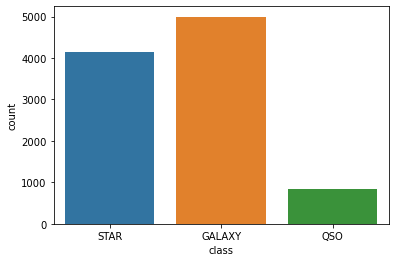

In [14]:
sns.countplot(x=space_dataset['class'])

In [15]:
def change_category_to_number(classCat):
    if classCat=='STAR':
        return 0
    elif classCat=='GALAXY':
        return 1
    else:
        return 2

In [18]:
space_dataset['classCat']=space_dataset['class'].apply(change_category_to_number)

In [19]:
space_dataset.head()

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,class,redshift,plate,mjd,fiberid,classCat
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,STAR,-0.000009,3306,54922,491,0
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,STAR,-0.000055,323,51615,541,0
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,GALAXY,0.123111,287,52023,513,1
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,STAR,-0.000111,3306,54922,510,0
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,STAR,0.000590,3306,54922,512,0


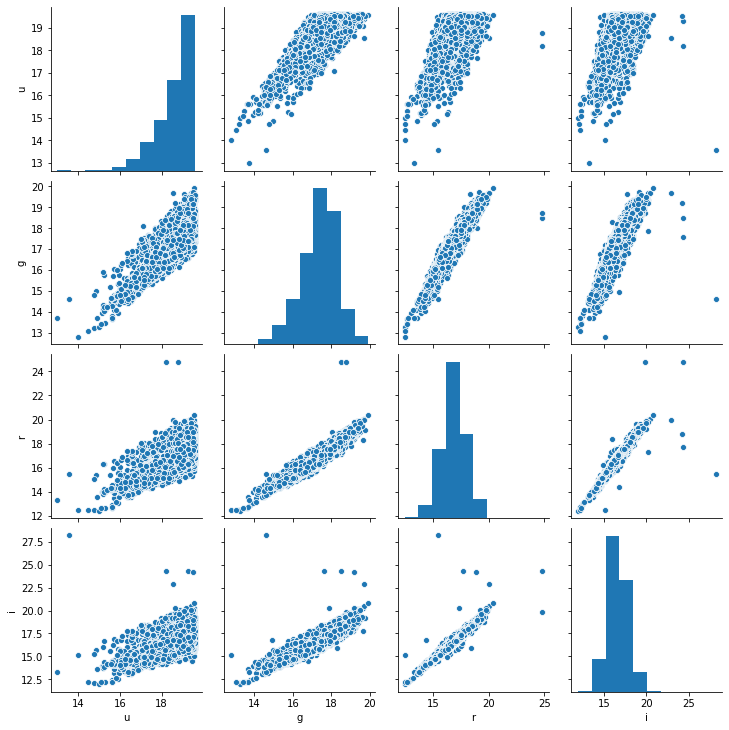

In [20]:
sns.pairplot(space_dataset[['u','g','r','i']])

In [21]:
space_dataset.drop(['run','rerun','camcol','field','class'],axis=1,inplace=True)

In [22]:
space_dataset.head()

,ra,dec,u,g,r,i,z,redshift,plate,mjd,fiberid,classCat
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,-0.000009,3306,54922,491,0
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,-0.000055,323,51615,541,0
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,0.123111,287,52023,513,1
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,-0.000111,3306,54922,510,0
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,0.000590,3306,54922,512,0


In [23]:
space_dataset.dtypes

ra          float64
dec         float64
u           float64
g           float64
r           float64
i           float64
z           float64
redshift    float64
plate         int64
mjd           int64
fiberid       int64
classCat      int64
dtype: object

In [25]:
x=space_dataset.drop('classCat',axis=1)
y=space_dataset['classCat']

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=30)

In [28]:
dtClassifer=DecisionTreeClassifier(max_leaf_nodes=15,random_state=0)

In [29]:
dtClassifer.fit(x_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=15, random_state=0)

In [32]:
prediction=dtClassifer.predict(x_test)

In [34]:
prediction[:10]

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1], dtype=int64)

In [35]:
y_test[:10]

8793    0
1122    0
1283    0
9318    0
7765    1
3011    1
7125    1
8823    1
3121    1
9314    1
Name: classCat, dtype: int64

In [39]:
accuracy_score(y_true=y_test,y_pred=prediction)

0.9893333333333333

In [41]:
lrClassifier=LogisticRegression()

In [43]:
lrClassifier.fit(x_train,y_train)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
prediction=lrClassifier.predict(x_test)

In [45]:
prediction[:10]

array([1, 0, 0, 0, 1, 1, 1, 1, 1, 1], dtype=int64)

In [46]:
y_test[:10]

8793    0
1122    0
1283    0
9318    0
7765    1
3011    1
7125    1
8823    1
3121    1
9314    1
Name: classCat, dtype: int64

In [47]:
accuracy_score(y_true=y_test,y_pred=prediction)

0.8016666666666666